In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn import datasets
from matplotlib.colors import ListedColormap
%matplotlib inline

In [35]:
def plotdata(X, y, lb_x, lb_y, t1, t2, t3, axes=None):
    c1 = np.in1d(y, [0])
    c2 = np.in1d(y, [1])
    c3 = np.in1d(y, [2])
    C1 = X[c1]
    C2 = X[c2]
    C3 = X[c3]
    if axes == None:
        axes = plt.gca()
    axes.scatter(C1[:,0], C1[:,1],marker='o',c='b',linewidth=1,label=t1)
    axes.scatter(C2[:,0], C2[:,1],marker='o',c='y',linewidth=1,label=t2)
    axes.scatter(C3[:,0], C3[:,1],marker='o',c='g',linewidth=1,label=t3)
    axes.set_xlabel(lb_x)
    axes.set_ylabel(lb_y)
    axes.legend(frameon=True, fancybox=True)

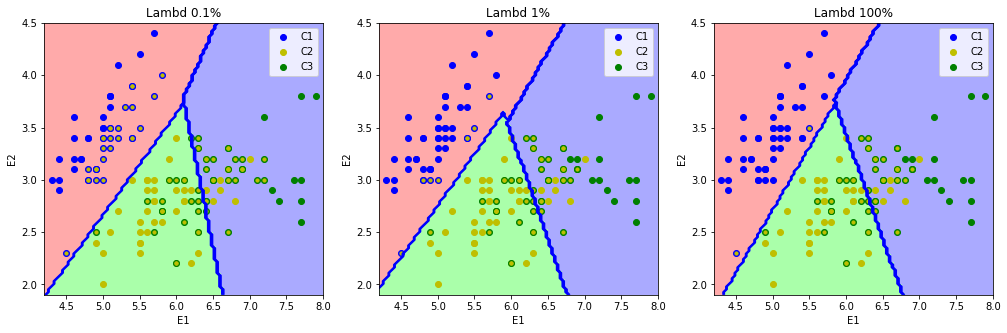

In [37]:
#调入数据
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
#分类器初始化
fig,axes = plt.subplots(1, 3, figsize=(17, 5))
for i, CC in enumerate([0.1, 1, 100]):
    #
    svc = svm.SVC(kernel='linear',C=CC)
    model = svc.fit(X, y)
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_N = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(X_N)
    zz = zz.reshape(xx.shape)
    axes.flatten()[i].contour(xx, yy, zz, linewidth=1, colors='b')
    color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    axes.flatten()[i].pcolormesh(xx, yy, zz, cmap=color)
    plotdata(X, y, "E1", "E2", "C1", "C2", "C3", axes.flatten()[i])
    axes.flatten()[i].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=10, facecolor='y')
    axes.flatten()[i].set_title("Lambd {}".format(CC))